### Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats

import sklearn.linear_model as lm
from sklearn import model_selection
from sklearn.metrics import mean_squared_error,mean_absolute_error  

import torch

### Import Scripts

In [2]:
from functions import *
from data_preprocess import *

### Create the Regression Dataset

In [3]:
#Create new DataFrame with Selected Features
data_fs = data[['male', 'age', 'BPMeds', 'prevalentHyp', 'sysBP', 'diaBP', 'heartRate', 'glucose', 'TenYearCHD', 'educ4']]

#DataFrame to NumPy Array
data_np_fs = data_fs.to_numpy()

#Splitting the Predicted Value from the Attributes
idx_y = list(data_fs.columns).index('sysBP')
idx_X = list(range(0, idx_y)) + list(range(idx_y + 1, len(data_fs.columns)))
X = data_np_fs[:, idx_X]
y = data_np_fs[:, idx_y]
attributeNames = list(data_fs.columns[idx_X])
N, M = X.shape

#Normalize the Data
X = stats.zscore(X)

### K-Fold Cross Validation

In [4]:
K1 = 5
CV1 = model_selection.KFold(n_splits=K1,shuffle=True, random_state=0)

K2 = 5
CV2 = model_selection.KFold(n_splits=K2,shuffle=True, random_state=0)

### Initialize Variables

In [5]:
#=====================================ANN=====================================#
inner_ANN_error = np.empty((K1,1))
outer_ANN_error = []
k_hidden = np.empty((K1,1))
opt_k1_hidden = []

#Parameters for Neural Network Classifier
n_hidden_units = [85, 90]      
n_replicates = 1        
max_iter = 10000

#==========================Baseline Linear Regression=========================#
baseline_error = np.zeros(K1)

#========================Regularized Linear Regression========================#
rlr_error = np.zeros(K1)
lambdas_opt = []

### Training


Outer Crossvalidation fold: 1/5

Inner Crossvalidation fold: 1/5

	Replicate: 1/1
		Iter	Loss			Rel. loss


/home/chrypapa/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([2584])) that is different to the input size (torch.Size([2584, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/chrypapa/.local/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


		1000	3256.1252	0.00229149
		2000	865.0876	0.0003993157
		3000	715.3054	0.00011637304
		4000	627.9025	0.00012693339
		5000	552.1935	0.00012267569
		6000	503.0681	7.0849266e-05
		7000	480.30972	2.28729e-05
		8000	475.21704	2.7613746e-06
		Final loss:
		8312	474.94788	9.638178e-07

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	2926.6357	0.002304998
		2000	870.35803	0.00029647702
		3000	743.20215	0.00012645584
		4000	648.22156	0.00014601753
		5000	557.1951	0.00012891197
		6000	501.72327	7.6512646e-05
		7000	479.26053	2.0885418e-05
		8000	475.04694	1.8629909e-06
		Final loss:
		8169	474.93088	9.638524e-07

Inner Crossvalidation fold: 2/5

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	3413.6643	0.0021153283
		2000	904.834	0.00041258402
		3000	722.82776	0.00013668873
		4000	620.1189	0.00012960883
		5000	547.7169	0.00010340153
		6000	499.36258	6.275918e-05
		7000	479.9487	1.952024e-05
		8000	475.60718	2.309953e-06
		Final loss:
		8498	475.21848	9.63269e-07

	Replicate: 1/1
		Iter	Loss			Re

/home/chrypapa/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([3230])) that is different to the input size (torch.Size([3230, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


		1000	3466.0925	0.0021222567
		2000	1017.9851	0.00039825443
		3000	814.8799	0.00013824776
		4000	699.8299	0.00014048246
		5000	587.88007	0.00014636824
		6000	516.0315	8.858235e-05
		7000	485.5484	3.4253044e-05
		8000	477.4819	5.0491476e-06
		Final loss:
		8544	476.7882	9.600976e-07

Error rate (ANN) 1/5: 476.7882080078125


Error rate (Regularized Linear Regression) 1/5: 139.48
Optimal lambda: 10.0


Outer Crossvalidation fold: 2/5

Inner Crossvalidation fold: 1/5

	Replicate: 1/1
		Iter	Loss			Rel. loss


/home/chrypapa/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([2584])) that is different to the input size (torch.Size([2584, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


		1000	3452.3174	0.0022299844
		2000	894.265	0.00040661506
		3000	734.02783	0.00012978188
		4000	637.3568	0.00012811439
		5000	561.0394	0.00012172055
		6000	506.52017	7.825795e-05
		7000	481.1999	2.676242e-05
		8000	475.27274	3.2747332e-06
		Final loss:
		8363	474.9271	9.6386e-07

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	2984.4333	0.0022879024
		2000	913.1285	0.00030550736
		3000	761.7748	0.00021211887
		4000	646.95667	0.00014800062
		5000	559.9743	0.00013622688
		6000	502.57782	7.6868266e-05
		7000	479.48572	2.1957554e-05
		8000	475.05902	1.927183e-06
		Final loss:
		8175	474.9337	9.638467e-07

Inner Crossvalidation fold: 2/5

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	3295.8298	0.002119026
		2000	938.7106	0.00042589597
		3000	733.93915	0.000146924
		4000	634.80237	0.00013180192
		5000	553.11066	0.00015402335
		6000	497.65036	5.8560352e-05
		7000	479.62335	1.9024475e-05
		8000	475.38544	2.3752257e-06
		Final loss:
		8250	475.183	9.633409e-07

	Replicate: 1/1
		Iter	Loss			Re

/home/chrypapa/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([3230])) that is different to the input size (torch.Size([3230, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


		1000	2968.29	0.00243465
		2000	731.61176	0.00047329965
		3000	596.68634	0.0001040183
		4000	543.75214	7.823082e-05
		5000	512.7367	4.5827535e-05
		6000	496.3064	2.0168114e-05
		7000	490.90292	2.9218038e-06
		Final loss:
		7342	490.58148	9.953102e-07

Error rate (ANN) 2/5: 490.58148193359375


Error rate (Regularized Linear Regression) 2/5: 119.61
Optimal lambda: 10.0


Outer Crossvalidation fold: 3/5

Inner Crossvalidation fold: 1/5

	Replicate: 1/1
		Iter	Loss			Rel. loss


/home/chrypapa/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([2584])) that is different to the input size (torch.Size([2584, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


		1000	3267.031	0.002163187
		2000	870.7568	0.0005072259
		3000	687.412	0.00012855107
		4000	600.86536	0.000107763444
		5000	539.84344	9.824022e-05
		6000	498.1154	6.0159673e-05
		7000	479.1313	1.7706496e-05
		8000	475.283	2.1189016e-06
		Final loss:
		8237	475.10464	9.634998e-07

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	3110.2573	0.0021942211
		2000	991.79865	0.00032802293
		3000	814.5288	0.00016632378
		4000	678.5175	0.00016755566
		5000	577.52673	0.00014941441
		6000	507.76218	9.122668e-05
		7000	480.1917	2.5039217e-05
		8000	475.1038	2.1197009e-06
		Final loss:
		8206	474.9515	9.638104e-07

Inner Crossvalidation fold: 2/5

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	3474.4224	0.0021112317
		2000	961.5313	0.00043139418
		3000	773.0007	0.00014360531
		4000	658.10693	0.00013408915
		5000	568.1105	0.00013062434
		6000	508.45456	8.000062e-05
		7000	482.04584	2.8804518e-05
		8000	475.52725	3.7863872e-06
		Final loss:
		8408	475.0933	9.635228e-07

	Replicate: 1/1
		Iter	Loss			Re

/home/chrypapa/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([3230])) that is different to the input size (torch.Size([3230, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


		1000	3223.0344	0.002116399
		2000	913.47485	0.00038237797
		3000	754.74835	0.000124279
		4000	658.49896	0.00018849249
		5000	564.1052	0.00012246534
		6000	506.43387	8.417579e-05
		7000	482.1929	2.2277283e-05
		8000	477.5488	2.42837e-06
		Final loss:
		8249	477.34344	9.589809e-07

Error rate (ANN) 3/5: 477.34344482421875


Error rate (Regularized Linear Regression) 3/5: 134.19
Optimal lambda: 10.0


Outer Crossvalidation fold: 4/5

Inner Crossvalidation fold: 1/5

	Replicate: 1/1
		Iter	Loss			Rel. loss


/home/chrypapa/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([2584])) that is different to the input size (torch.Size([2584, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


		1000	3847.8145	0.002032452
		2000	1101.6222	0.00037096368
		3000	883.82526	0.00018849266
		4000	738.9284	0.00016872241
		5000	619.08746	0.00017181094
		6000	528.45056	0.00011998836
		7000	485.73993	4.6552632e-05
		8000	474.68143	7.3290807e-06
		Final loss:
		8636	473.64688	9.664652e-07

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	3139.4614	0.0022269664
		2000	1051.5714	0.00028119175
		3000	879.6162	0.00015103573
		4000	733.4907	0.00022345722
		5000	607.65594	0.00016721064
		6000	519.3747	0.00012748927
		7000	482.1758	3.594822e-05
		8000	474.0773	4.312944e-06
		Final loss:
		8393	473.6375	9.664843e-07

Inner Crossvalidation fold: 2/5

	Replicate: 1/1
		Iter	Loss			Rel. loss


/home/chrypapa/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([2585])) that is different to the input size (torch.Size([2585, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


		1000	3447.428	0.0021391518
		2000	988.5449	0.00040023934
		3000	790.4174	0.00014777512
		4000	672.83954	0.00021004671
		5000	578.0476	0.00013217928
		6000	512.5011	7.7404286e-05
		7000	487.28323	2.680407e-05
		8000	481.1985	3.424665e-06
		Final loss:
		8385	480.81448	9.520579e-07

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	2990.9739	0.0021221654
		2000	989.61633	0.00032436996
		3000	815.7925	0.00015073355
		4000	680.72375	0.0001656682
		5000	574.9592	0.0001426528
		6000	512.25146	8.530467e-05
		7000	486.11407	2.4671395e-05
		8000	480.98013	2.3475975e-06
		Final loss:
		8244	480.78745	9.5211146e-07

Inner Crossvalidation fold: 3/5

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	3480.6	0.001988178
		2000	1224.7236	0.00035460587
		3000	984.1774	0.00016332456
		4000	801.66785	0.0001802557
		5000	658.9937	0.00019677606
		6000	548.0087	0.0001563478
		7000	485.64822	7.144267e-05
		8000	468.00775	1.25196675e-05
		Final loss:
		8805	466.07434	9.821679e-07

	Replicate: 1/1
		Iter	Loss			Re

/home/chrypapa/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([3231])) that is different to the input size (torch.Size([3231, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


		1000	2877.1726	0.0023198696
		2000	859.1692	0.00027946325
		3000	722.117	0.00011933157
		4000	624.6993	0.0001237747
		5000	553.5908	0.000110681955
		6000	505.73438	6.818305e-05
		7000	487.42166	1.5214052e-05
		8000	484.3454	1.3231638e-06
		Final loss:
		8069	484.30643	8.821806e-07

Error rate (ANN) 4/5: 484.3064270019531


Error rate (Regularized Linear Regression) 4/5: 144.54
Optimal lambda: 10.0


Outer Crossvalidation fold: 5/5

Inner Crossvalidation fold: 1/5

	Replicate: 1/1
		Iter	Loss			Rel. loss


/home/chrypapa/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([2584])) that is different to the input size (torch.Size([2584, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


		1000	3284.5388	0.0021647809
		2000	1023.9979	0.00032664658
		3000	857.9006	0.00014561218
		4000	723.594	0.00019295557
		5000	602.77856	0.00016289492
		6000	523.4382	0.00011286025
		7000	484.61185	4.307184e-05
		8000	474.48135	6.367418e-06
		Final loss:
		8578	473.63367	9.664922e-07

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	2942.8928	0.0022697493
		2000	865.4732	0.00035298048
		3000	718.037	0.0001268081
		4000	625.76886	0.00013380185
		5000	550.84436	0.00011588641
		6000	499.1608	7.0425755e-05
		7000	477.7163	1.8908779e-05
		8000	473.78098	2.1256192e-06
		Final loss:
		8187	473.6481	9.664627e-07

Inner Crossvalidation fold: 2/5

	Replicate: 1/1
		Iter	Loss			Rel. loss


/home/chrypapa/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([2585])) that is different to the input size (torch.Size([2585, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


		1000	3416.2192	0.0021205102
		2000	972.3087	0.00039995785
		3000	768.0911	0.0002755827
		4000	648.6761	0.00013349856
		5000	557.2433	0.00010787594
		6000	509.49146	6.732095e-05
		7000	485.9959	2.618437e-05
		8000	481.03455	2.2204495e-06
		Final loss:
		8263	480.83557	8.250808e-07

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	2954.736	0.00233708
		2000	778.82874	0.0003992816
		3000	638.3459	0.00010784158
		4000	564.09644	0.00010353655
		5000	517.8592	6.446555e-05
		6000	491.8466	3.3442186e-05
		7000	482.34323	8.414762e-06
		Final loss:
		7827	480.80368	9.520793e-07

Inner Crossvalidation fold: 3/5

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	3545.665	0.0021230672
		2000	1028.661	0.00036062408
		3000	835.90265	0.00015528318
		4000	692.81494	0.00016489104
		5000	587.87854	0.00015020893
		6000	515.1158	0.000107101885
		7000	477.75363	4.5223034e-05
		8000	467.12817	7.316929e-06
		Final loss:
		8647	466.07648	9.821633e-07

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	3179.1648	0.002

/home/chrypapa/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([3231])) that is different to the input size (torch.Size([3231, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


		1000	3414.6753	0.0022375004
		2000	894.66046	0.00053423055
		3000	664.6392	0.00017702077
		4000	584.2642	0.0001033052
		5000	531.43835	7.72874e-05
		6000	495.1941	2.8594346e-05
		7000	488.18005	5.813671e-06
		Final loss:
		7943	486.94424	9.400732e-07

Error rate (ANN) 5/5: 486.9442443847656


Error rate (Regularized Linear Regression) 5/5: 117.11
Optimal lambda: 10.0



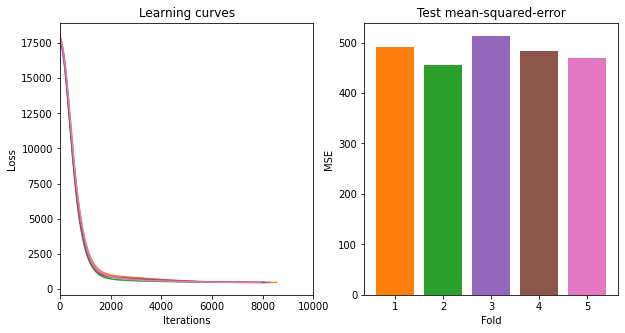

In [6]:
#=====================================ANN=====================================#
#Setup Figure for Display of Learning Curves and Error Rates in Fold
lc = []
summaries, summaries_axes = plt.subplots(1,2, figsize=(10,5))
color_list = ['tab:orange', 'tab:green', 'tab:purple', 
              'tab:brown', 'tab:pink', 'tab:gray', 
              'tab:olive', 'tab:cyan', 'tab:red', 'tab:blue']

for (k1, (train_index1, test_index1)) in enumerate(CV1.split(X,y)): 
    print('\nOuter Crossvalidation fold: {0}/{1}'.format(k1+1,K1))
    
    #Extract Training and Test set for Current CV Fold
    X_train1 = X[train_index1,:]
    y_train1 = y[train_index1]
    X_test1 = X[test_index1,:]
    y_test1 = y[test_index1]

    #=====================================ANN=====================================#
    #Convert to Tensors
    X_train_ANN1 = torch.tensor(X[train_index1,:], dtype=torch.float)
    y_train_ANN1 = torch.tensor(y[train_index1], dtype=torch.float)
    X_test_ANN1 = torch.tensor(X[test_index1,:], dtype=torch.float)
    y_test_ANN1 = torch.tensor(y[test_index1], dtype=torch.uint8)
    
    #Initialize Variables
    inner_ANN_error_hidden = np.empty((K2,len(n_hidden_units)))
    
    for (k2, (train_index2, test_index2)) in enumerate(CV2.split(X_train1, y_train1)):
        print('\nInner Crossvalidation fold: {0}/{1}'.format(k2+1,K2))
                                                      
        #Extract Training and Test set for Current CV Fold
        X_train2 = X[train_index2,:]
        y_train2 = y[train_index2]
        X_test2 = X[test_index2,:]
        y_test2 = y[test_index2]
    
        #Convert to Tensors
        X_train_ANN2 = torch.tensor(X[train_index2,:], dtype=torch.float)
        y_train_ANN2 = torch.tensor(y[train_index2], dtype=torch.float)
        X_test_ANN2 = torch.tensor(X[test_index2,:], dtype=torch.float)
        y_test_ANN2 = torch.tensor(y[test_index2], dtype=torch.uint8)
        
        #Train the Net on Different Number of Hidden Units
        for i, number in enumerate(n_hidden_units):
            
            #Define the Model
            model = lambda: torch.nn.Sequential(torch.nn.Linear(M, number), 
                                                torch.nn.Tanh(),
                                                torch.nn.Linear(number, 1))
            loss_fn = torch.nn.MSELoss() 
        
            #Train the Net on Training Data
            net, final_loss, learning_curve = train_neural_net(model, loss_fn, 
                                                               X=X_train_ANN2,
                                                               y=y_train_ANN2,
                                                               n_replicates=n_replicates,
                                                               max_iter=max_iter)
    
            #Determine Estimated Class Labels for Test Set
            y_test_ANN2_pred = net(X_test_ANN2)
            
            #Turn to NumPy
            y_test_ANN2_np = y_test_ANN2.type(torch.float).data.numpy()
            y_test_ANN2_pred_np = y_test_ANN2_pred.type(torch.float).data.numpy().reshape((y_test_ANN2.shape[0],))
    
            #Determine Errors and Errors
            inner_ANN_error_hidden[k2,i] = np.square(y_test_ANN2_np-y_test_ANN2_pred_np).sum(axis=0)/y_test_ANN2_np.shape[0]

        inner_ANN_error[k2] = np.min(np.mean(inner_ANN_error_hidden,axis=0))
        k_hidden[k2] = n_hidden_units[np.argmin(np.mean(inner_ANN_error_hidden,axis=0))] 
    
    #==========================Baseline Linear Regression=========================#
    baseline_error[k1] = np.square(y_test1 - y_test1.mean()).sum() / len(y_test1)
    print('\nError rate (Baseline Linear Regression) {0}/{1}: {2}\n'.format(k1+1, K1, np.round(baseline_error[k1], decimals = 2)))   
    
    #========================Regularized Linear Regression========================#     
    #Initialize Variables
    lambdas = np.power(10.,range(-5,9))
    error_lambdas_k1 = np.zeros(len(lambdas))
    
    for l in range(len(lambdas)):
        error_lambdas_k2 = np.zeros(K2)
        
        for (k2 , (train_index2, test_index2)) in enumerate(CV2.split(X_train1, y_train1)):
            
            #Extract Training and Test Set for Current CV Fold
            X_train2 = X[train_index2,:]
            y_train2 = y[train_index2]
            X_test2 = X[test_index2,:]
            y_test2 = y[test_index2]

            rlr_model = lm.Ridge(alpha = lambdas[l], fit_intercept = True)
            rlr_model = rlr_model.fit(X_train2, y_train2)

            y_pred2 = rlr_model.predict(X_test2).T
            error_lambdas_k2[k2] = np.square(y_test2 - y_pred2).sum() / len(y_pred2)
        
        error_lambdas_k1[l] = np.sum(error_lambdas_k2) / len(error_lambdas_k2)
    
    #=====================================ANN=====================================#    
    opt_k2_hidden = int(k_hidden[inner_ANN_error.argmin()].item())
    
    #Define the model
    model = lambda: torch.nn.Sequential(torch.nn.Linear(M, opt_k2_hidden), 
                                        torch.nn.Tanh(),   
                                        torch.nn.Linear(opt_k2_hidden, 1))
    loss_fn = torch.nn.MSELoss() 

    #Train the Net on Training Data
    net, final_loss, learning_curve = train_neural_net(model, loss_fn,
                                                       X=X_train_ANN1,
                                                       y=y_train_ANN1,
                                                       n_replicates=n_replicates,
                                                       max_iter=max_iter)
    
    print('\nError rate (ANN) {0}/{1}: {2}\n'.format(k1+1, K1, final_loss))
    lc.append(learning_curve)
    
    #Determine Estimated Class Labels for Test Set
    y_test_ANN1_pred = net(X_test_ANN1)
    
    #Turn to NumPy
    y_test_ANN1_np = y_test_ANN1.type(torch.float).data.numpy()
    y_test_ANN1_pred_np = y_test_ANN1_pred.type(torch.float).data.numpy().reshape((y_test_ANN1.shape[0],))
  
    #Determine Errors and Errors
    mse = np.square(y_test_ANN1_np-y_test_ANN1_pred_np).sum(axis=0)/y_test_ANN1_np.shape[0]
    outer_ANN_error.append(mse) 
    opt_k1_hidden.append(opt_k2_hidden)
    
    # Display the learning curve for the best net in the current fold
    h, = summaries_axes[0].plot(learning_curve, color=color_list[k1])
    h.set_label('CV fold {0}'.format(k1+1))
    summaries_axes[0].set_xlabel('Iterations')
    summaries_axes[0].set_xlim((0, max_iter))
    summaries_axes[0].set_ylabel('Loss')
    summaries_axes[0].set_title('Learning curves')
    
    #========================Regularized Linear Regression========================# 
    min_error = np.min(error_lambdas_k1)
    lambdas_opt_idx = np.argmin(error_lambdas_k1)
    lambdas_opt.append(lambdas[lambdas_opt_idx])
    
    rlr_model = lm.Ridge(alpha = lambdas[lambdas_opt_idx], fit_intercept = True)
    rlr_model = rlr_model.fit(X_train1, y_train1)
    
    y_pred1 = rlr_model.predict(X_test1).T
    rlr_error[k1] = np.square(y_test1 - y_pred1).sum() / len(y_test1)
    
    print('\nError rate (Regularized Linear Regression) {0}/{1}: {2}'.format(k1+1, K1, np.round(rlr_error[k1], decimals = 2)))
    print('Optimal lambda: {0}\n'.format(lambdas_opt[k1]))
    
#=====================================ANN=====================================#
# Display the MSE across folds
summaries_axes[1].bar(np.arange(1, K1+1), np.squeeze(np.asarray(outer_ANN_error)), color=color_list)
summaries_axes[1].set_xlabel('Fold');
summaries_axes[1].set_xticks(np.arange(1, K1+1))
summaries_axes[1].set_ylabel('MSE');
summaries_axes[1].set_title('Test mean-squared-error')

plt.savefig('Learning Curves.png')
plt.show()

### Print Generalization Error

In [7]:
for i in range(K1): 
    print('Generalization Error of ANN for {0} Fold: \t{1:.2f}, \t Hidden Units: {2}'.format(i+1, outer_ANN_error[i], opt_k1_hidden[i]))
    print('Generalization Error of RLR for {0} Fold: \t{1:.2f}, \t Lambda: {2}'.format(i+1, rlr_error[i], lambdas_opt[i]))
    print('Generalization Error of BLR for {0} Fold: \t{1:.2f}\n'.format(i+1, baseline_error[i]))

Generalization Error of ANN for 1 Fold: 	491.84, 	 Hidden Units: 85
Generalization Error of RLR for 1 Fold: 	139.48, 	 Lambda: 10.0
Generalization Error of BLR for 1 Fold: 	508.58

Generalization Error of ANN for 2 Fold: 	455.68, 	 Hidden Units: 90
Generalization Error of RLR for 2 Fold: 	119.61, 	 Lambda: 10.0
Generalization Error of BLR for 2 Fold: 	453.53

Generalization Error of ANN for 3 Fold: 	513.01, 	 Hidden Units: 85
Generalization Error of RLR for 3 Fold: 	134.19, 	 Lambda: 10.0
Generalization Error of BLR for 3 Fold: 	505.77

Generalization Error of ANN for 4 Fold: 	482.67, 	 Hidden Units: 90
Generalization Error of RLR for 4 Fold: 	144.54, 	 Lambda: 10.0
Generalization Error of BLR for 4 Fold: 	478.30

Generalization Error of ANN for 5 Fold: 	470.16, 	 Hidden Units: 85
Generalization Error of RLR for 5 Fold: 	117.11, 	 Lambda: 10.0
Generalization Error of BLR for 5 Fold: 	467.46



### Diagram of Best Neural Net in Last Fold

In [8]:
#weights = [net[i].weight.data.numpy().T for i in [0,2]]
#biases = [net[i].bias.data.numpy() for i in [0,2]]
#tf =  [str(net[i]) for i in [1,2]]
#draw_neural_net(weights, biases, tf, attribute_names=attributeNames)

### Statistical Evaluation

In [9]:
#Initialize Variables
alpha = 0.05
length = len(y_test1)
y_true = np.array(y_test1).reshape(length,1)
y_rlr = np.array(y_pred1).reshape(length,1)
y_ann = list(float(i) for i in y_test_ANN1_pred_np)
y_ann = np.array(y_ann).reshape(length,1)

#Compute z and Confidence Interval of ANN
zANN = np.abs(y_true - y_ann) ** 2 
ciANN = stats.t.interval(1-alpha, df=len(zANN)-1, loc=np.mean(zANN), scale=stats.sem(zANN))  

#Compute z and Confidence Interval of BLR
zBASE = np.abs(y_true - y_test1.mean()) ** 2
ciBASE = stats.t.interval(1-alpha, df=len(zBASE)-1, loc=np.mean(zBASE), scale=stats.sem(zBASE)) 

#Compute z and Confidence Interval of RLR
zLIN = np.abs(y_true - y_rlr) ** 2
ciLIN = stats.t.interval(1-alpha, df=len(zLIN)-1, loc=np.mean(zLIN), scale=stats.sem(zLIN)) 

#Compare ANN and Baseline
zANBA = zBASE - zANN
ciANBA = stats.t.interval(1-alpha, len(zANBA)-1, loc=np.mean(zANBA), scale=stats.sem(zANBA))  
p_ANBA = stats.t.cdf( -np.abs( np.mean(zANBA) )/stats.sem(zANBA), df=len(zANBA)-1) 

#Compare ANN and RLR
zANLI = zANN - zLIN
ciANLI = stats.t.interval(1-alpha, len(zANLI)-1, loc=np.mean(zANLI), scale=stats.sem(zANLI))  
p_ANLI = stats.t.cdf( -np.abs( np.mean(zANLI) )/stats.sem(zANLI), df=len(zANLI)-1)

#Compare bASELINE and RLR
zBALI = zBASE - zLIN
ciBALI = stats.t.interval(1-alpha, len(zBALI)-1, loc=np.mean(zBALI), scale=stats.sem(zBALI))  
p_BALI = stats.t.cdf( -np.abs( np.mean(zBALI) )/stats.sem(zBALI), df=len(zBALI)-1) 

### Print Results

In [10]:
print('(ANN/Baseline) Confidence Interval: [{0:.3f}, {1:.3f}] \t P-Value: {2}'.format(*ciANBA[0], *ciANBA[1], *p_ANBA))
print('(ANN/RLR)      Confidence Interval: [{0:.3f}, {1:.3f}] \t P-Value: {2}'.format(*ciANLI[0], *ciANLI[1], *p_ANLI))
print('(Baseline/RLR) Confidence Interval: [{0:.3f}, {1:.3f}] \t\t P-Value: {2}'.format(*ciBALI[0], *ciBALI[1], *p_BALI))

(ANN/Baseline) Confidence Interval: [-5.342, 0.364] 	 P-Value: 0.04362186189472689
(ANN/RLR)      Confidence Interval: [302.113, 403.555] 	 P-Value: 1.223982608963753e-38
(Baseline/RLR) Confidence Interval: [298.498, 402.193] 		 P-Value: 9.196272004197146e-37
